<a href="https://colab.research.google.com/github/hamusita/ML/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/titanic.csv", sep="\t")[2:]

In [ ]:
df.tail(10)

,status,age,sex,survived
2193,crew,adult,female,yes
2194,crew,adult,female,yes
2195,crew,adult,female,yes
2196,crew,adult,female,yes
2197,crew,adult,female,yes
2198,crew,adult,female,yes
2199,crew,adult,female,yes
2200,crew,adult,female,no
2201,crew,adult,female,no
2202,crew,adult,female,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_En = LabelEncoder()
for label in df.columns.to_list():
  print(label)
  df[label]= label_En.fit_transform(df[label])

status
age
sex
survived


In [ ]:
x = df.drop(['survived'] , axis=1 )
y = df["survived"]

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.7, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
print("train score : {:.3f}".format(gnb.score(x_tr, y_tr)))
print("test score : {:.3f}".format(gnb.score(x_te, y_te)))

train score : 0.779
test score : 0.761


[0.         0.21676892 1.        ] [0.         0.69767442 1.        ]


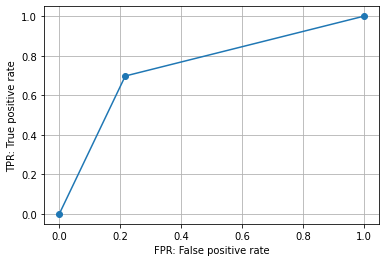

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(gnb.predict(x_te), y_te)

print(fpr, tpr)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()